# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
# se realizara un funcion para obtener info per columnas
def info_column(df,colum):
    data = df[colum]
    unique =  data.unique()
    empty = data[data.isna()]
    
    df_info = pd.DataFrame({'columna':[colum], 'unicos': len(unique), 'vacios': len(empty)})
    
    return df_info

In [4]:
l = list()
for col in df.columns:
    df_aux = info_column(df,col)
    l.append(df_aux)
df_info = pd.concat(l).reset_index(drop=True)
df_info

,columna,unicos,vacios
0,sepalLength,36,1
1,sepalWidth,26,1
2,petalLength,45,1
3,petalWidth,24,1
4,species,11,1


In [5]:
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [6]:
# correcion de clases de especies
df['species']=df['species'].str.lower().str.strip()
# Reemplazo por "default" los valores Nan
df.loc[df["species"].isnull(),"species"] = "default"

df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

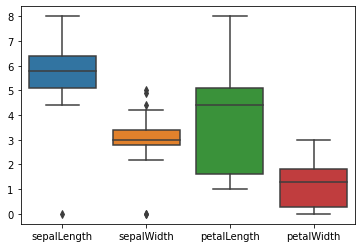

In [7]:
# Reemplazo valores Nan
df.loc[df["sepalLength"].isnull(),"sepalLength"] = 0
df.loc[df["sepalWidth"].isnull(),"sepalWidth"] = 0
df.loc[df["petalLength"].isnull(),"sepalWidth"] = 0
df.loc[df["petalWidth"].isnull(),"petalWidth"] = 0

stats_df = df.drop(['species'], axis=1)
sns.boxplot(data=stats_df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [8]:
df1=df
df1.loc[df1['sepalLength']<4.0,'label']='sepalLength'
df1.loc[df1['sepalLength']>7.0,'label']='sepalLength'
df1.loc[df1['sepalWidth']<2.0,'label']='sepalWidth'
df1.loc[df1['sepalWidth']>4.5,'label']='sepalWidth'
df1.loc[df1['petalLength']<1.0,'label']='petalLength'
df1.loc[df1['petalLength']>7.0,'label']='petalLength'
df1.loc[df1['petalWidth']<0.1,'label']='petalLength'
df1.loc[df1['petalWidth']>2.5,'label']='petalWidth'
df1.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,petalWidth
1,7.2,3.6,6.1,2.5,virginica,sepalLength
2,6.3,3.3,6.0,2.5,virginica,NaN
3,6.7,3.3,5.7,2.5,virginica,NaN
4,6.3,3.4,5.6,2.4,virginica,NaN


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

In [9]:
SL_inf =  df['sepalLength'] >= 4
SL_sup =  df['sepalLength'] <= 7

SW_inf =  df['sepalWidth'] >= 2
SW_sup =  df['sepalWidth'] <= 4.5

PL_inf =  df['petalLength'] >= 1
PL_sup =  df['petalLength'] <= 7

PW_inf =  df['petalWidth'] >= 0.1
PW_sup =  df['petalWidth'] <= 2.5

SL = SL_inf & SL_sup
SW = SW_inf & SW_sup
PL = PL_inf & PL_sup
PW = PW_inf & PW_sup

df["label"]= SL & SW & PL & PW
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True


5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

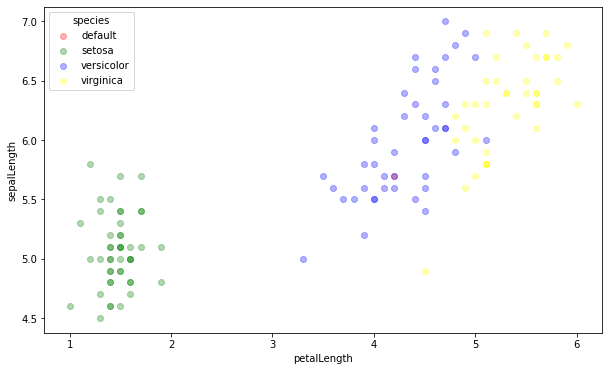

In [10]:
filtro = df[df['label']] 

color = dict(zip(filtro["species"].unique(), 
                     [ "yellow","blue","red","green"]))

plt.figure(figsize=(10, 6))

for sp, group in filtro.groupby("species"):
    plt.scatter(group["petalLength"], 
                group["sepalLength"],
                color=color[sp],
                alpha=0.3,
                edgecolor=None,
                label=sp,
               )
    
plt.legend(frameon=True, title="species")
plt.xlabel("petalLength")
plt.ylabel("sepalLength")
plt.show()